# Project:  WeRateDogs_Tweets Data Wrangling and Analysis

# Table of Contents

>- Introduction
>- Data Wrangling
>- Exploratory Data Analysis
>- Conclusion

# Introduction


## Data Description

> WeRateDogs is a Twitter account that rates people’s dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because “they’re good dogs Brent.” WeRateDogs has over 4 million followers and has received international media coverage. The following datasets were used for this analysis:


> `Enhanced Twitter Archive`

> The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet’s text, which was used to extract rating, dog name, and dog “stage” (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive “enhanced.” Of the 5000+ tweets, only tweets with rating was filtered.


> `Additional Data via the Twitter API`

> Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter’s API. Well, “anyone” who has access to data for the 3000 most recent tweets, at least. But you, because you have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. The resulting data will be read line by line into the pandas Dataframe with (at minimum)tweet ID, retweet_count and favorite_count.


> `Image Predictions File`

> Every image in the WeRateDogs Twitter archive was ran through a neural network that can classify breeds of dogs. The resulting data is a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).


> The interpretation of the Image prediction file is given as:

>- P1 is the algorithm’s No.1 prediction for the image in the tweet.
>- P1_conf is how confident the algorithm is in its No.1 prediction.
>- P1_dog is whether or not the No.1 prediction is a breed of dog.
>- P2 is the algorithm’s second most likely prediction.
>- P2_conf is how confident the algorithm is in its No.2 prediction.
>- P2_dog is whether or not the No.2 prediction is a breed of dog.



## Questions for analysis


>- What is the most popular dog name.

>- Which dog is most loved by people.

>- What is the most popular Dog stages.

# Data Wrangling

> Involves the Data Gathering, Accessing, Cleaning and Storing processes.


## Data Gathering



In [1]:
# import requured libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


1. The WeRateDogs Twitter archive data:

In [2]:
# Read the data into pandas

df_twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')


2. The image prediction data:

In [3]:
# Use request to obtain data from the url
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)

# Write data into a file
with open('images.tsv', 'wb') as file:
    file.write(response.content)

In [4]:
# Read the file into pandas

df_images= pd.read_csv('images.tsv', sep= '\t')

3. The tweet data containing retweet_count and favorite_count

In [5]:
# Create an empty list
tweets= []

# Read data line by line and append into the list
with open('tweet-json.txt', 'r') as file:
    for line in file:
        data= json.loads(line) # Load the Json file into a variable 'data'
        tweets.append(data)

In [6]:
# Since objects in Json are stored as a coll;ection of 'key : values' pair, 
# we can access the name column by using the keys method.

tweets[0].keys()   # Access the name of each column in the dataset.

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [7]:
# Load the dataset into pandas using the pandas.DataFrame method

df_tweets= pd.DataFrame(tweets, columns= ['id', 'retweet_count', 'favorite_count'])

## Assessing Data

> The datasets are accessed. Their shapes are determined and inspections are made to detect error in quality and tidiness. We only want original ratings (no retweets) that have images. The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.




In [8]:
# Inspect twitter_archive Dataset by visual assessment

df_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1370,702321140488925184,NaN,NaN,2016-02-24 02:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please enjoy this picture as much as I did. 12...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702321140...,12,10,None,None,None,None,None
982,749403093750648834,NaN,NaN,2016-07-03 00:43:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Duuun dun... duuun dun... dunn dun. dunn dun....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749403093...,10,10,None,None,None,None,None
1894,674743008475090944,NaN,NaN,2015-12-10 00:10:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just saw a spider. 10/10 d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674743008...,10,10,Sophie,None,None,None,None
806,772102971039580160,NaN,NaN,2016-09-03 16:04:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's an OU cheerleader. About ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772102971...,11,10,Penny,None,None,None,None
1696,681242418453299201,NaN,NaN,2015-12-27 22:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Champ. He's being sacrificed to the Az...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681242418...,10,10,Champ,None,None,None,None
1710,680583894916304897,NaN,NaN,2015-12-26 03:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. Her tennis ball slowly rolled d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680583894...,8,10,Penny,None,None,None,None
1019,746790600704425984,NaN,NaN,2016-06-25 19:42:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you just can't resist... 10/10 topnotch t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746790600...,10,10,None,None,None,None,None
1146,727155742655025152,NaN,NaN,2016-05-02 15:20:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",When you're trying to enjoy yourself but end u...,NaN,NaN,NaN,https://vine.co/v/ixa1ejbXiM7,11,10,None,None,None,None,None
534,807106840509214720,NaN,NaN,2016-12-09 06:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None
1279,708845821941387268,NaN,NaN,2016-03-13 02:43:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with magic eyes. Not wearing a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708845821...,9,10,None,None,None,pupper,None


In [9]:
# Inspect image_prediction Dataset by visual assessment

df_images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
942,704113298707505153,https://pbs.twimg.com/media/CcWDTerUAAALORn.jpg,2,otter,0.945537,False,mink,0.018231,False,sea_lion,0.015861,False
1157,733482008106668032,https://pbs.twimg.com/media/Ci3Z_idUkAA8RUh.jpg,1,French_bulldog,0.619382,True,computer_keyboard,0.142274,False,mouse,0.058505,False
544,677301033169788928,https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg,1,Japanese_spaniel,0.661178,True,Pekinese,0.150119,True,Chihuahua,0.119720,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
1452,776813020089548800,https://pbs.twimg.com/media/CsfLUDbXEAAu0VF.jpg,1,toy_poodle,0.516610,True,miniature_poodle,0.255033,True,standard_poodle,0.168989,True
290,671166507850801152,https://pbs.twimg.com/media/CVB2TnWUYAA2pAU.jpg,1,refrigerator,0.829772,False,toilet_seat,0.030083,False,shower_curtain,0.015461,False
1027,710844581445812225,https://pbs.twimg.com/media/Cd1tYGmXIAAoW5b.jpg,1,dingo,0.536593,False,Pembroke,0.200407,True,basenji,0.060734,True
1747,823322678127919110,https://pbs.twimg.com/media/C20HmaKWgAQ6-6X.jpg,2,cowboy_boot,0.990253,False,Chihuahua,0.001836,True,papillon,0.001274,True
1849,839990271299457024,https://pbs.twimg.com/media/C6g-sX-VsAAHfJ9.jpg,2,Staffordshire_bullterrier,0.604938,True,American_Staffordshire_terrier,0.311540,True,Boston_bull,0.037159,True
861,697242256848379904,https://pbs.twimg.com/media/Ca0aIR9WcAAHiPy.jpg,1,grey_fox,0.236031,False,Siamese_cat,0.165791,False,Eskimo_dog,0.063533,True


In [10]:
# Inspect tweet Dataset by visual assessment

df_tweets.sample(10)

,id,retweet_count,favorite_count
1372,701952816642965504,1149,4167
45,883360690899218434,3825,22986
1092,736736130620620800,1972,4736
1436,696900204696625153,1156,3492
320,834209720923721728,5476,22594
1726,679872969355714560,749,2365
744,780092040432480260,2655,0
1178,719339463458033665,1403,4822
1580,687109925361856513,2803,6370
1394,699788877217865730,557,2458


In [11]:
df_twitter_archive.info() # Inspect feature attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df_images.info()  # Inspect feature attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
df_tweets.info()  # Inspect feature attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [14]:
df_images.describe()  # Inspect statistical summary of numerical features

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
df_tweets.describe()  # Inspect statistical summary of numerical features

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [16]:
df_twitter_archive.duplicated().sum()  # Inspect for the sum of duplicated rows

0

In [17]:
df_images.duplicated().sum()  # Inspect for the sum of duplicated rows

0

In [18]:
df_tweets.duplicated().sum()  # Inspect for the sum of duplicated rows

0

In [19]:
df_twitter_archive.isnull().sum()  # Inspect for the sum of Null Values

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [20]:
df_twitter_archive['rating_numerator'].value_counts()  # Get the count of individual rating_numerator

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [21]:
df_twitter_archive['rating_denominator'].value_counts()  # Get the count of individual rating_denominator

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [22]:
df_twitter_archive['name'].value_counts()  # Get the count of individual dog name

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [23]:
# Get the count of the four dog stages

df_twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()  

doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  None     None    puppo       1
       floofer  None    None        1
dtype: int64

In [24]:
# Get the count of the three prediction output

df_images[['p1', 'p2', 'p3']].value_counts()

p1                p2                  p3                
malamute          Siberian_husky      Eskimo_dog            17
golden_retriever  Labrador_retriever  kuvasz                16
Pembroke          Cardigan            Chihuahua             15
                                      basenji               11
golden_retriever  kuvasz              Labrador_retriever     9
                                                            ..
Saint_Bernard     Pekinese            Great_Pyrenees         1
                  Leonberg            golden_retriever       1
                  English_springer    boxer                  1
Rottweiler        miniature_pinscher  kelpie                 1
zebra             tiger               prairie_chicken        1
Length: 1742, dtype: int64

### Observations


### Tidiness issues

`df_twitter_archive`:

1. doggo, floofer, pupper and puppo should be in one column not four.

`df_images`:

2. columns with 'conf' should be renamed with 'confidence'.

`df_twitter_archive`, `df_images` & `df_tweets`:

3. all three dataframes should be combined into one dataframe.

### Quality issues

`df_twitter_archive`:

1. retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp should be dropped since we are only interested in tweets.

2. in_reply_status_id, in_reply_to_user_id and expanded_urls columns contain missing values and will be dropped since they are not needed for the analysis.

3. tweet_id should be a string('object') and not an integer('int64').

4. timestamp should be 'datetime' not 'string'(object).

5. some values in rating_denominator column are not '10'(which is the standard denominator for WeRateDogs).

6. some values in rating_numerator column are eqaul to Zero and some are less than 10.

7. Null values are represented with none in name column.


`df_images`:

8. tweet_id should be 'string' not 'int'.

9. Names in p1, p2 and p3 columns have some starting with upper letters and others with lower letters.


`df_tweets`:

10. id column name should be 'tweet_id' not 'id'

11. The to-be-named tweet_id should be 'string' not 'int'.


## Cleaning Data



> We must clean all identified issues. Before the actual cleaning, we have to make a copy of the datasets so as to maintain the original nature of the datasets.

In [25]:
# Make copies of original pieces of data

df_twitter_archive_clean= df_twitter_archive.copy()
df_images_clean= df_images.copy()
df_tweets_clean= df_tweets.copy()

> For proper cleaning, its best we address the structural issues (Tidiness) before the content issues (Quality).

### Tidiness

### Issue #1:  doggo, floofer, pupper and puppo should be in one column not four

#### Define: combine all dog stages in a new column and drop all existing columns

#### Code

In [26]:
# Function that drops rows or columns depending on the axis indication
def drop_row_col(dframe, row_col, axis=0):
    dframe.drop(row_col, axis=axis, inplace=True) 

# Function that joins the four columns into one column and gives it a string datatype    
def join(x):
    return ', '.join(x.dropna().astype(str))

In [27]:
# List of the four dog stages
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']

# Replace all None values with Null using the replace method and np.nan method
df_twitter_archive_clean[dog_stages] = df_twitter_archive_clean[dog_stages].replace('None', np.nan)

# Join all four columns into one column
df_twitter_archive_clean['dog_stages'] = df_twitter_archive_clean[dog_stages].apply(join, axis=1)

# Replace empty values with Null values
df_twitter_archive_clean['dog_stages'] = df_twitter_archive_clean['dog_stages'].replace('',np.nan)

# Drop the four existing columns representing the dog stages
drop_row_col(df_twitter_archive_clean, dog_stages, axis=1)

#### Test

In [28]:
# Inspect the newly created column

df_twitter_archive_clean['dog_stages'].value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stages, dtype: int64

In [29]:
df_twitter_archive_clean.sample(5)  # Inspect random 5 rows of the Dataset by visual assessment

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
442,819588359383371776,NaN,NaN,2017-01-12 16:54:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jazzy. She just found out that sandwic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819588359...,13,10,Jazzy,NaN
1125,730196704625098752,NaN,NaN,2016-05-11 00:43:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charles. He's camera shy. Tail longer ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730196704...,6,10,Charles,NaN
1183,718939241951195136,NaN,NaN,2016-04-09 23:10:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Otis. Everybody look at Otis. 12/10 wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718939241...,12,10,Otis,NaN
1386,700518061187723268,NaN,NaN,2016-02-19 03:11:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vincent. He's the man your girl is wit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700518061...,10,10,Vincent,NaN
621,796116448414461957,NaN,NaN,2016-11-08 22:25:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I didn't believe it at first but now I can see...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796116448...,11,10,None,NaN


### Issue #2:  columns with 'conf' should be renamed with 'confidence' (Quality issue)

#### Define: Use rename method to edit column names

#### Code

In [30]:
# Rename columns having 'conf' to 'confidence'

df_images_clean.rename(columns= {'p1_conf' : 'p1_confidence', 'p2_conf' : 'p2_confidence', 'p3_conf' : 'p3_confidence' }, 
                       inplace= True)

#### Test

In [31]:
df_images_clean.head(2)  # Inspect top 2 rows of the cleaned dataset

,tweet_id,jpg_url,img_num,p1,p1_confidence,p1_dog,p2,p2_confidence,p2_dog,p3,p3_confidence,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Issue #3:  id column name should be 'tweet_id' not 'id'   (Quality Issue)



#### Define: Rename the id column in the df_tweet dataset

#### Code

In [32]:
# Rename 'id' to 'tweet_id'

df_tweets_clean.rename(columns= {'id' : 'tweet_id'}, inplace= True)

#### Test

In [33]:
df_tweets_clean.head(2)  # Inspect top 2 rows of the cleaned dataset

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


### Issue #4:  All three dataframes should be combined into one dataframe.



#### Define: Merge the three datasets using merge method'

#### Code

In [34]:
# Combine all three datasets into a single master dataset

df_weratedogs_archive= pd.merge(df_twitter_archive_clean, df_images_clean, on='tweet_id', how= 'left')
df_weratedogs_archive= pd.merge(df_weratedogs_archive, df_tweets_clean, on='tweet_id', how= 'left')

#### Test

In [35]:
df_weratedogs_archive.sample(20)   # Inspect random 20 rows of the Dataset by visual assessment

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_confidence,p1_dog,p2,p2_confidence,p2_dog,p3,p3_confidence,p3_dog,retweet_count,favorite_count
731,781655249211752448,NaN,NaN,2016-09-30 00:41:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Combo. The daily struggles of being a ...,NaN,NaN,NaN,https://vine.co/v/5rt6T3qm7hL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1314.0,4466.0
791,773704687002451968,NaN,NaN,2016-09-08 02:09:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He knows he's adorable. One ear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773704687...,...,0.324251,True,Yorkshire_terrier,0.181210,True,Airedale,0.133436,True,1891.0,7317.0
1885,674793399141146624,6.717299e+17,4.196984e+09,2015-12-10 03:30:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have found another. 13/10 https://t.co/HwroP...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674793399...,...,0.119693,True,Afghan_hound,0.072763,True,miniature_schnauzer,0.063786,True,1225.0,2697.0
2083,670811965569282048,NaN,NaN,2015-11-29 03:50:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Maggie. She enjoys her stick in the yard....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670811965...,...,0.994090,True,Walker_hound,0.003973,True,beagle,0.001406,True,295.0,1202.0
1258,710283270106132480,NaN,NaN,2016-03-17 01:55:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gunner. He's a Figamus Newton. King of...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710283270...,...,0.932401,True,Lhasa,0.030806,True,Tibetan_terrier,0.008974,True,580.0,2308.0
1178,719551379208073216,NaN,NaN,2016-04-11 15:43:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harnold. He accidentally opened the fr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719551379...,...,0.873233,True,Siberian_husky,0.076435,True,Eskimo_dog,0.035745,True,2192.0,5515.0
413,822872901745569793,NaN,NaN,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822872901...,...,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,48265.0,132810.0
675,789530877013393408,NaN,NaN,2016-10-21 18:16:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzy. She smiles a lot. 12/10 contagi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789530877...,...,0.363272,True,kelpie,0.197021,True,Norwegian_elkhound,0.151024,True,3942.0,13188.0
1535,689977555533848577,NaN,NaN,2016-01-21 01:07:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a pup wearing a beret. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689977555...,...,0.291081,False,Labrador_retriever,0.179625,True,sombrero,0.121493,False,502.0,1490.0
1701,680940246314430465,NaN,NaN,2015-12-27 02:36:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alice. She's an idiot. 4/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680940246...,...,0.289598,True,West_Highland_white_terrier,0.157195,True,toy_poodle,0.074435,True,1225.0,3544.0


In [36]:
df_weratedogs_archive.info()  # Inspect feature attributes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stages                  380 n

### Quality

### Issue #1: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp should be dropped since we are only interested in tweets.



#### Define: Drop all retweets using the drop method.

#### Code

In [37]:
# Obtain the index of all retweets
row_index= df_weratedogs_archive[df_weratedogs_archive['retweeted_status_id'].notnull()].index

# List of all retweet columns to be dropped
columns= ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

# Drop all retweet rows
drop_row_col(df_weratedogs_archive, row_index, axis= 0)

# Drop all retweet columns
drop_row_col(df_weratedogs_archive, columns, axis= 1)

#### Test

In [38]:
df_weratedogs_archive.info()  # Inspect feature attributes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  dog_stages             344 non-null    object 
 11  jpg_url                1994 non-null   object 
 12  img_num                1994 non-null   float64
 13  p1                     1994 non-null   object 
 14  p1_confidence          1994 non-null   float64
 15  p1_d

### Issue #2: in_reply_status_id, in_reply_to_user_id and expanded_urls columns contain missing values and will be dropped since they are not needed for the analysis.



#### Define: Drop all affected columns using the drop method.

#### Code

In [39]:
# Obtain the index of all replies
row_index1= df_weratedogs_archive[df_weratedogs_archive['in_reply_to_status_id'].notnull()].index

# List of all columns to be dropped
columns1= ['in_reply_to_user_id', 'in_reply_to_status_id', 'expanded_urls']

# Drop all reply rows
drop_row_col(df_weratedogs_archive, row_index1, axis= 0)

# Drop all columns
drop_row_col(df_weratedogs_archive, columns1, axis= 1)

#### Test

In [40]:
df_weratedogs_archive.info()  # Inspect feature attributes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   rating_numerator    2097 non-null   int64  
 5   rating_denominator  2097 non-null   int64  
 6   name                2097 non-null   object 
 7   dog_stages          336 non-null    object 
 8   jpg_url             1971 non-null   object 
 9   img_num             1971 non-null   float64
 10  p1                  1971 non-null   object 
 11  p1_confidence       1971 non-null   float64
 12  p1_dog              1971 non-null   object 
 13  p2                  1971 non-null   object 
 14  p2_confidence       1971 non-null   float64
 15  p2_dog              1971 non-null   object 
 16  p3    

### Issue #3: tweet_id should be a string('object') and not an integer('int64').



#### Define: convert tweet_id column data type to string by using the astype method.

#### Code

In [41]:
# Change tweet_id datatype to string

df_weratedogs_archive['tweet_id']= df_weratedogs_archive['tweet_id'].astype(str)

#### Test

In [42]:
df_weratedogs_archive.info()  # Inspect feature attributes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   object 
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   rating_numerator    2097 non-null   int64  
 5   rating_denominator  2097 non-null   int64  
 6   name                2097 non-null   object 
 7   dog_stages          336 non-null    object 
 8   jpg_url             1971 non-null   object 
 9   img_num             1971 non-null   float64
 10  p1                  1971 non-null   object 
 11  p1_confidence       1971 non-null   float64
 12  p1_dog              1971 non-null   object 
 13  p2                  1971 non-null   object 
 14  p2_confidence       1971 non-null   float64
 15  p2_dog              1971 non-null   object 
 16  p3    

### Issue #4: timestamp should be 'datetime' not 'string'(object).



#### Define: convert timestamp data type to datetime using the to_datetime method

#### Code

In [43]:
# Change timstamp datatype to datetime

df_weratedogs_archive['timestamp']= pd.to_datetime(df_weratedogs_archive['timestamp'])

#### Test

In [44]:
df_weratedogs_archive.info()  # Inspect feature attributes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   dog_stages          336 non-null    object             
 8   jpg_url             1971 non-null   object             
 9   img_num             1971 non-null   float64            
 10  p1                  1971 non-null   object             
 11  p1_confidence       1971 non-null   float64            
 12  p1_dog              1971 non-null 

### Issue #5: some values in rating_denominator column are not '10' (which is the standard denominator for WeRateDogs)



#### Define: To correct this, lets replace any number thats not 10 to 10.

#### Code

In [45]:
# Replace all denominator to '10'

df_weratedogs_archive['rating_denominator']= df_weratedogs_archive['rating_denominator'].replace(range(0, 1000), 10)

#### Test

In [46]:
df_weratedogs_archive['rating_denominator'].value_counts()  # Get the count of rating_denominator

10    2097
Name: rating_denominator, dtype: int64

### Issue #6: some values in rating_numerator column are eqaul to Zero and some are less than 10



#### Define: to correct this, we would add 10 to values less than 10 or equal to zero.

#### Code

In [47]:
# Add '10' to numerator values less than 10 or equal to zero

df_weratedogs_archive.rating_numerator[df_weratedogs_archive['rating_numerator'] <= 10] = df_weratedogs_archive.rating_numerator[df_weratedogs_archive['rating_numerator'] <= 10].add(10)

#### Test

In [48]:
df_weratedogs_archive['rating_numerator'].value_counts()  # Get the count of individual rating_numerator

12      495
20      436
11      418
13      306
19      153
18       98
14       54
17       52
15       34
16       32
99        1
88        1
144       1
26        1
121       1
44        1
60        1
45        1
80        1
204       1
50        1
1776      1
165       1
27        1
75        1
24        1
84        1
10        1
420       1
Name: rating_numerator, dtype: int64

### Issue #7: Null values are represented with none in name column.



#### Define: Correct by using replace methoid and nan method(numpy)

#### Code

In [49]:
# Replace None values with Null values

df_weratedogs_archive['name']= df_weratedogs_archive['name'].replace('None', np.nan)

#### Test

In [50]:
df_weratedogs_archive['name'].isnull().sum()  # Inspect the sum of Null Values in the dataset

603

### Issue #8: Names in p1, p2 and p3 columns have some starting with upper letters and others with lower letters.



#### Define: Correct using the title method

#### Code

In [51]:
# Correct to Proper case

df_weratedogs_archive['p1']= df_weratedogs_archive['p1'].str.title()
df_weratedogs_archive['p2']= df_weratedogs_archive['p2'].str.title()
df_weratedogs_archive['p3']= df_weratedogs_archive['p3'].str.title()

#### Test

In [52]:
df_weratedogs_archive.head(10)  # Inspect top 10 rows

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,...,p1_confidence,p1_dog,p2,p2_confidence,p2_dog,p3,p3_confidence,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774.0,41048.0
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,...,0.425595,True,Irish_Terrier,0.116317,True,Indian_Elephant,0.076902,False,3261.0,20562.0
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,...,0.341703,True,Border_Collie,0.199287,True,Ice_Lolly,0.193548,False,2158.0,12041.0
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,NaN,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,...,0.566142,True,Eskimo_Dog,0.178406,True,Pembroke,0.076507,True,16716.0,56848.0
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,...,0.487574,True,Irish_Setter,0.193054,True,Chesapeake_Bay_Retriever,0.118184,True,4429.0,28226.0
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711.0,32467.0


In [53]:
df_weratedogs_archive.info()  # Inspect feature attributes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                1494 non-null   object             
 7   dog_stages          336 non-null    object             
 8   jpg_url             1971 non-null   object             
 9   img_num             1971 non-null   float64            
 10  p1                  1971 non-null   object             
 11  p1_confidence       1971 non-null   float64            
 12  p1_dog              1971 non-null 

## Storing Data

> store the combined datasets in a comma_separated_file (csv)

In [54]:
# Store the newly combined and clean dataset into a csv file

df_weratedogs_archive.to_csv('weratedogs_archive.csv', index= False)

# Exploratory Data Analysis


## Analyzing and Visualizing Data

> Obtain insights to questions by analysis and visualization of the dataset

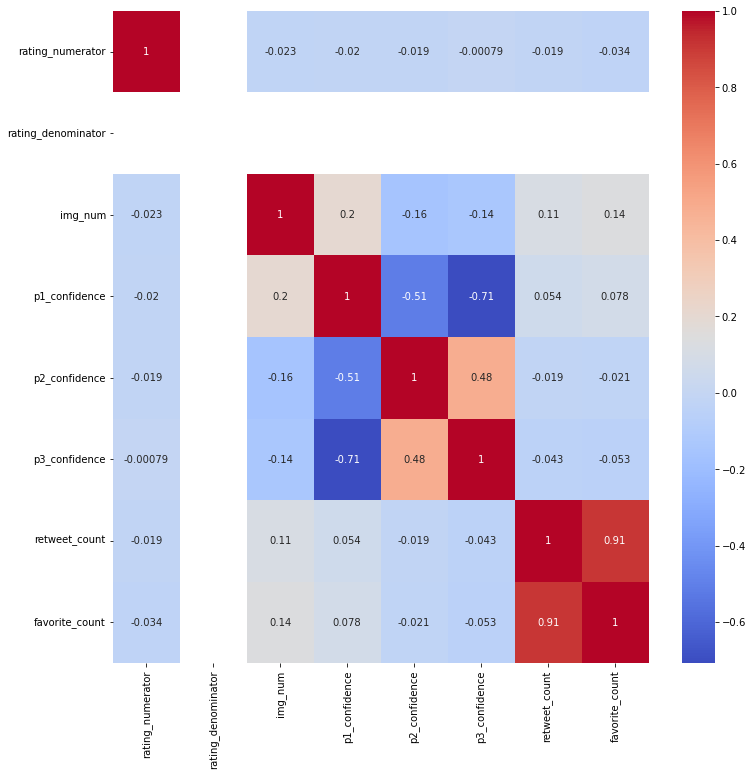

In [55]:
# Obtain the correlation for features in the dataset
corr= df_weratedogs_archive.corr()

# Visualize the correlation matrix
plt.figure(figsize= (12,12))
sns.heatmap(corr, cmap= 'coolwarm', annot= True)
plt.show()

> It is evident that there is a strong correlation between the favorite counts and retweet counts.

### Question 1: What is the most popular dog name?

In [56]:
df_weratedogs_archive['name'].value_counts()  # Get the count of individual dog name

a             55
Charlie       11
Lucy          11
Oliver        10
Cooper        10
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: name, Length: 954, dtype: int64

In [57]:
# Replace invalid name with Null values

df_weratedogs_archive['name']= df_weratedogs_archive['name'].replace('a', np.nan)

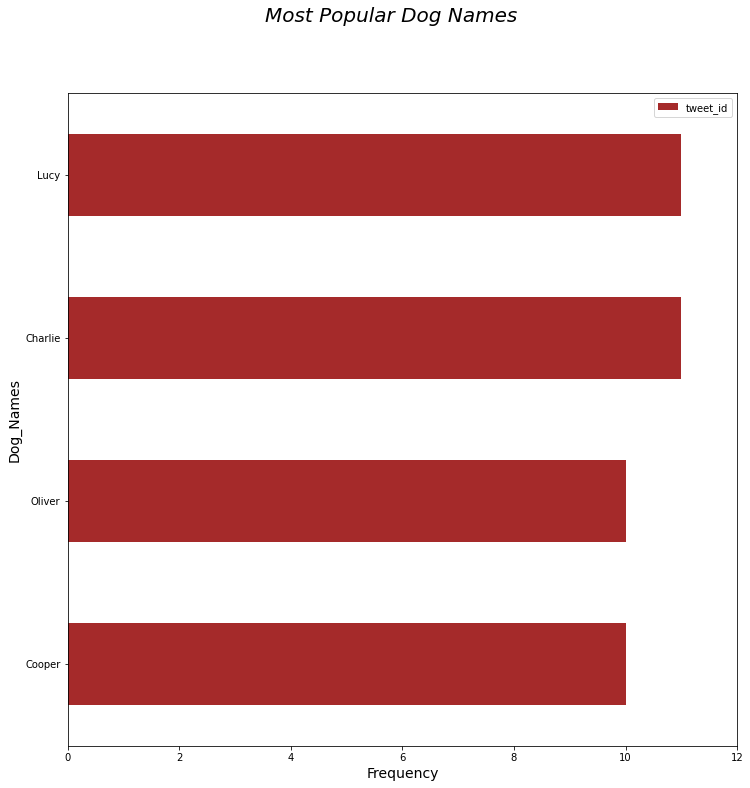

In [58]:
# Select only rows having a name from the dataset and 
# visualize only names having '10' or more appearance in descending order.

dog_names= df_weratedogs_archive.query('name == name')
dog_names1= dog_names.groupby('name').count()[['tweet_id']]
dog_names1.query('tweet_id >= 10').sort_values(by= ['tweet_id']).plot(kind= 'barh', figsize= (12,12), color= 'brown', stacked= False)

plt.xlim(right= 12) # Set highest count displayed to be '12'
plt.suptitle('Most Popular Dog Names', fontsize= 20, fontstyle= 'oblique')
plt.xlabel('Frequency', fontsize= 14)
plt.ylabel('Dog_Names', fontsize= 14)
plt.show()

> Lucy and Charlie are the most popular dog names.

### Question 2: Which dog is most loved by people?

In [59]:
df_weratedogs_archive['favorite_count'].median()  # Obtain the median favorite_count

4196.0

In [60]:
df_weratedogs_archive['favorite_count'].max()  # Obtain the maximum favorite_count

132810.0

In [61]:
# Select only rows having a dog name from the dataset
loved_dog= df_weratedogs_archive.query('name == name')

# Select the row with a dog name whose favorite_count is the maximum
loved_dog.query('favorite_count == favorite_count.max()')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,...,p1_confidence,p1_dog,p2,p2_confidence,p2_dog,p3,p3_confidence,p3_dog,retweet_count,favorite_count
66,879415818425184262,2017-06-26 19:07:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,13,10,Duddles,NaN,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1.0,...,0.383404,True,Boston_Bull,0.134967,True,Cardigan,0.110481,True,45849.0,107956.0


> The name of the most loved dog is Duddles with a favorite_count of 107956.0. Since favorite_count is highly correlated(positive) to retweet_count, it follows that Duddles is also the dog(with a name) with the most retweet.

### Question 2: What is the most popular Dog stage?

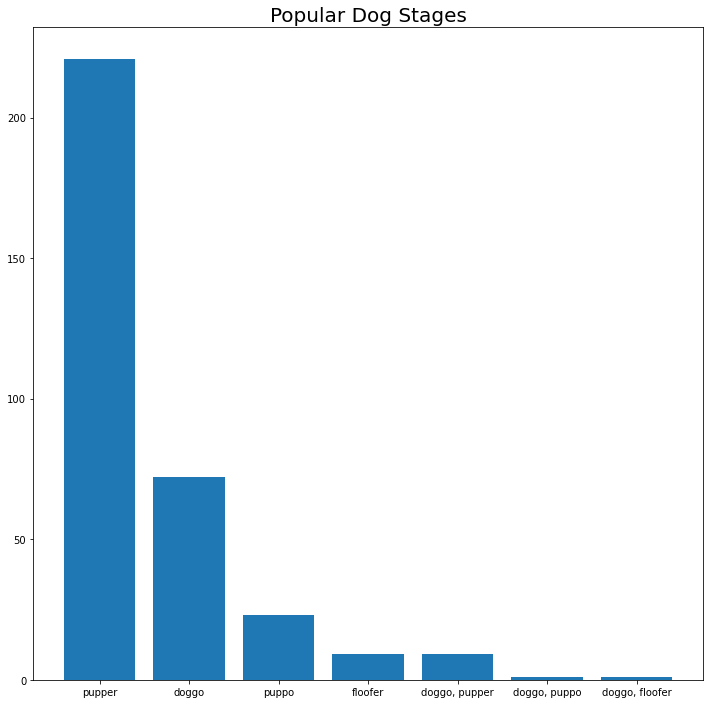

In [62]:
# Visualize the 'dog_stages' column

plt.figure(figsize= (12,12))
plt.title('Popular Dog Stages', fontsize= 20)
plt.bar(x= df_weratedogs_archive['dog_stages'].value_counts().index, height= df_weratedogs_archive['dog_stages'].value_counts().values)
plt.show()

> pupper is the most popular dog stage


# Conclusion



### Insights:
1.  **Most popular Dog** names are **Lucy** and **Charlie**.


2. Retweet_count and Favorite_count are highly correlated positively with a correlation coefficient of 0.91.


3. The **most loved dog** with a name is **Duddles** with a rating of 13/10.


4. The **most popular dog stage** is **Pupper** with a count of over 200 dogs.


5. The **least popular** dog stage is **'doggo, floofer**' stage.